In [5]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

In [6]:
np.random.seed(101)
tf.set_random_seed(101)

In [7]:
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

In [9]:
x,y

(array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
         5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
        10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
        15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
        20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
        25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
        30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
        35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
        40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
        45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ]),
 array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
         5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
        10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
        15.30612245, 16.32653061, 17.34693878, 18

In [10]:
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

In [11]:
x,y

(array([ 0.13118902,  1.58574886, -1.73138986,  0.43339774,  5.56384851,
         7.77321572,  4.57817874, 10.29176178,  9.9356162 ,  6.7031851 ,
        10.63790236, 10.04154543,  9.70003718, 15.55012022, 18.00958007,
        13.16495174, 12.99502208, 18.17532615, 20.199289  , 17.59766573,
        21.8906139 , 21.57151122, 18.83685589, 20.57234166, 21.98553533,
        29.46474729, 26.69593542, 28.18133669, 30.44998104, 29.92753091,
        33.91747336, 34.09601427, 31.87704387, 32.53126413, 38.31689127,
        34.46333834, 39.65549241, 40.39732374, 39.0808018 , 43.17567335,
        37.59349837, 38.65951464, 44.46920122, 47.00138997, 42.17444159,
        44.12294771, 48.31870775, 45.27360867, 50.59056093, 49.90108178]),
 array([ 1.44542215,  1.1927937 , -1.61201012,  0.85271732,  4.68327335,
         2.0655101 ,  6.12338269,  4.24693369,  4.58573251,  6.60988885,
         9.74302668, 14.24518839, 15.83901099, 13.09064546, 13.97466902,
        16.4044347 , 14.92339458, 14.28756352, 14

In [12]:
n = len(x)


In [13]:
n

50

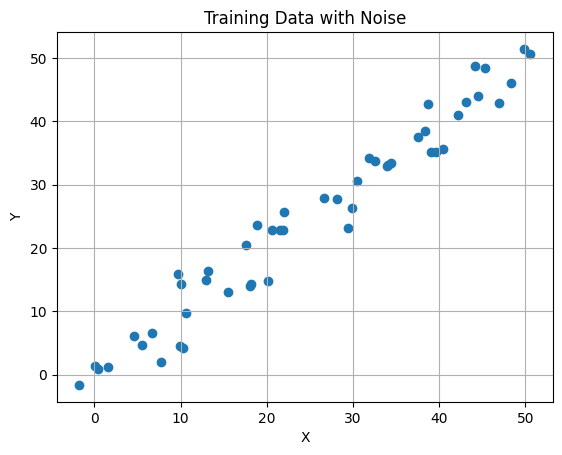

In [16]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data with Noise')
plt.grid(True)
plt.show()


In [18]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [19]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [20]:
W = tf.Variable(np.random.randn(), dtype=tf.float32)
b = tf.Variable(np.random.randn(), dtype=tf.float32)

In [21]:
hypothesis = W * X + b

In [22]:
# cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [30]:
learning_rate = 0.001
training_epochs = 1000


In [31]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [39]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: x, Y: y})
        if (epoch+1) % 100 == 0:
            c = sess.run(cost, feed_dict={X: x, Y: y})
            print(f"Epoch: {epoch+1}, Cost: {c:.4f}, W: {sess.run(W):.4f}, b: {sess.run(b):.4f}")

    # Final results - inside the session block
    final_cost = sess.run(cost, feed_dict={X: x, Y: y})
    final_W = sess.run(W)
    final_b = sess.run(b)

    print("\nFinal Results:")
    print(f"Final Cost: {final_cost:.4f}")
    print(f"Final Weight (W): {final_W:.4f}")
    print(f"Final Bias (b): {final_b:.4f}")


Epoch: 100, Cost: 10.0887, W: 0.9492, b: 1.2796
Epoch: 200, Cost: 10.0426, W: 0.9512, b: 1.2118
Epoch: 300, Cost: 10.0012, W: 0.9531, b: 1.1475
Epoch: 400, Cost: 9.9639, W: 0.9549, b: 1.0864
Epoch: 500, Cost: 9.9304, W: 0.9566, b: 1.0285
Epoch: 600, Cost: 9.9002, W: 0.9582, b: 0.9736
Epoch: 700, Cost: 9.8731, W: 0.9597, b: 0.9216
Epoch: 800, Cost: 9.8487, W: 0.9612, b: 0.8722
Epoch: 900, Cost: 9.8267, W: 0.9625, b: 0.8253
Epoch: 1000, Cost: 9.8069, W: 0.9638, b: 0.7809

Final Results:
Final Cost: 9.8069
Final Weight (W): 0.9638
Final Bias (b): 0.7809


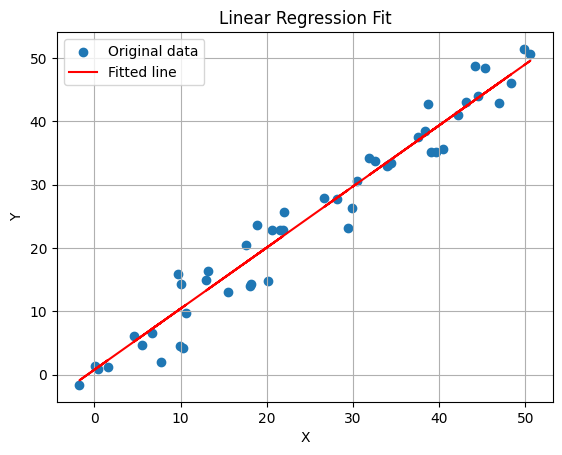

In [40]:
plt.scatter(x, y, label='Original data')
plt.plot(x, final_W * x + final_b, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()
